# U.S. Gun Purchases & Permits, 2010 - 2017

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The datasets I chose are (1) Federal Bureau of Investigation (FBI) National Instant Criminal Background Check System (NICS), and (2) population and demographic data from The United States Bureau of the Census. The former contains criminal background check for purposes of firearms sales for each U.S. state from 1998 to 2017; the latter contains population figures for each state and U.S. possession for 2010 and 2016, along with selected demographic data.

The most important aspect of the FBI dataset, and the bases for my analysis, comes from the GitHub page discussing it:


**These statistics represent the number of firearm background checks initiated through the NICS They do not represent the number of firearms sold Based on varying state laws and purchase scenarios, a one-to-one correlation cannot be made between a firearm background check and a firearm sale.**

**A bit more background, from The Trace:**

**Not all categories of background checks may be equally useful/pertinent to your research. When The New York Times analyzed NICS data in Dec. 2015, it included this methodological note:**

**Note: Sales estimates are calculated from handgun, long gun and multiple-gun background checks. Permit checks and other categories of background checks are excluded. In California, multiple-gun checks were excluded because data was inconsistent. Because state laws differ, sales levels between states cannot be directly compared.**


In consideration of this caveat, I decided to use the New York Times methodology for estimating gun sales. Moreover, comparison between and among the several states did not occur.



In [159]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [160]:
df_gun = pd.read_csv('gun_data.csv')
df_census = pd.read_csv('census_data.csv')

The following cells contain the standard inspection checks of both dataframes:

In [161]:
df_census.head(2)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


In [162]:
df_gun.head(2)


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303


In [163]:
df_census.shape

(85, 52)

In [164]:
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [165]:
df_census.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Population estimates, July 1, 2016, (V2016)",(c),5.20%,7.30%,50.30%,50.90%,50.30%,3.30%,0.10%,51.60%,...,0.103,0.048,50.40%,2.50%,"625,741",12.20%,32.90%,1.50%,50.30%,7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [166]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [167]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

### Data Cleaning: Removal of superfluous rows and columns

Upon inspection of the datframes, and considering the questions I will explore, I found the following:

Both frames contain data which cannot be used together. The census data is, frankly, all over the place. The population figures are for only two years: 2016 and 2010, with comparisons between the two. Moreover, the demographic data are from neither 2010 nor 2016, but from the comprehensive period 2011 through 2015. The FBI dataframe is defined on a monthly basis from 1998 through 2017; this will require the removal of literally thousands of rows of data which do not correspond to the census years of 2017 and 2010.

The FBI data are difficult to interpret. My inquiries are rather simple: the trends in gun purchases (as indicated by permit checks and types of firearm, which have no particular correlation and do not even add up together, i.e., the sum of handdun, long gun, and other purchases does not add up to the number of permit checks. Further, the prepawn redemption, and return figures are not necessary in to the scope of my inquiry, and without additional reserch and data, would only complicate the analysis at hand.

The first steps remove the unnecessary data from the census frame. I only want the population-by-state figures for 2010 and 2017, to use as a possible explanatory tool for any changes in gun purchases.

In [168]:
df_unwanted_indexes = df_census[df_census.index > 19]

In [169]:
df_census.drop(df_unwanted_indexes.index, axis=0)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",NaN,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


This cell removes the "Fact Note" column, which I don't need and is the only column populated primarily with nulls. I tended to drop one column at a time at first, to make sure I'm not making any errors.

In [170]:
df_census = df_census.drop(labels='Fact Note', axis=1)

In [171]:
df_census = df_census.drop(df_unwanted_indexes.index, axis=0)

In [172]:
df_census.tail(3)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
17,"Two or More Races, percent, July 1, 2016, (V2...",1.60%,7.30%,2.80%,2.00%,3.80%,3.00%,2.30%,2.60%,2.10%,...,0.023,0.019,1.90%,2.50%,1.90%,2.90%,4.60%,1.70%,1.90%,2.10%
18,"Hispanic or Latino, percent, July 1, 2016, (V...",4.20%,7.00%,30.90%,7.30%,38.90%,21.30%,15.70%,9.20%,24.90%,...,0.037,0.052,39.10%,13.80%,1.90%,9.10%,12.40%,1.50%,6.70%,10.00%
19,"White alone, not Hispanic or Latino, percent, ...",65.80%,61.20%,55.50%,72.90%,37.70%,68.60%,67.70%,62.90%,54.90%,...,0.825,0.742,42.60%,78.80%,93.10%,62.40%,69.50%,92.30%,81.70%,84.10%


The above cell, and all other .head() or .tail() statements, are checks to ensure my actions were correct.

In [173]:
df_gun.head(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303


As mentioned above, most of the columns in the FBI dataset were not germaine to my analysis.

In [174]:
#dropping unwanted columns in the NICS dataframe

df_gun.drop(labels=['permit_recheck', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other'], axis=1, inplace=True)

In [175]:
df_gun.drop(labels=['returned_handgun', 'returned_long_gun', 'returned_other'], axis=1, inplace=True)

In [176]:
df_gun.drop(labels=['rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other'], axis=1, inplace=True)

In [177]:
df_gun.drop(labels=['return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other', 'totals'], axis=1, inplace=True)

In [178]:
df_gun.drop(labels=['redemption_handgun', 'redemption_long_gun', 'redemption_other'], axis=1, inplace=True)

In [179]:
df_gun.head(1)

,month,state,permit,handgun,long_gun,other,multiple
0,2017-09,Alabama,16717.0,5734.0,6320.0,221.0,317


Next, I removed the data for the years that corresponded to the years in the census data frame. At this point I hung on to the 2011-2015 data because I could still use them to illustrate the trends in gun purchases. I kept the 2017 data because I concluded that those who purchased guns in 2017 were those who were counted in the 2016 census.

In [180]:
df_gun.drop(df_gun[df_gun.index > 5114].index, axis=0, inplace=True)

In [181]:
df_gun.tail(3)

,month,state,permit,handgun,long_gun,other,multiple
5112,2010-01,West Virginia,26.0,3735.0,4860.0,61.0,342
5113,2010-01,Wisconsin,0.0,4382.0,7950.0,153.0,7
5114,2010-01,Wyoming,379.0,1036.0,1413.0,26.0,47


In [182]:
df_gun.head(2)

,month,state,permit,handgun,long_gun,other,multiple
0,2017-09,Alabama,16717.0,5734.0,6320.0,221.0,317
1,2017-09,Alaska,209.0,2320.0,2930.0,219.0,160


As with all csv dataframes, the dates were stored as objects, and thus needed recasting to "datetime."

In [183]:
df_gun['month'] = pd.to_datetime(df_gun['month'])

In [184]:
df_gun.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            5105, 5106, 5107, 5108, 5109, 5110, 5111, 5112, 5113, 5114],
           dtype='int64', length=5115)

I was interested only in annual totals by year, so I extrcted the year and renamed the column.

In [185]:
df_gun.rename(columns={'month': 'year'}, inplace=True)

In [186]:
df_gun['year'] = df_gun['year'].dt.year

In [187]:
df_gun.head(3)

,year,state,permit,handgun,long_gun,other,multiple
0,2017,Alabama,16717.0,5734.0,6320.0,221.0,317
1,2017,Alaska,209.0,2320.0,2930.0,219.0,160
2,2017,Arizona,5069.0,11063.0,7946.0,920.0,631


Now I was ready for a preliminary grouping by state and year.

In [188]:
df_gun.groupby(['state', 'year']).sum()

permit   handgun  long_gun    other  multiple
state         year                                                 
Alabama       2010    4621.0  116963.0  136519.0   1771.0      5465
              2011    5036.0  130490.0  146290.0   2121.0      6262
              2012    6135.0  177239.0  184072.0   4348.0      9227
              2013  100231.0  195052.0  203530.0   5955.0      9270
              2014  204273.0  178355.0  170815.0   6715.0      9254
              2015  246203.0  243734.0  176075.0   9442.0     10781
              2016  291039.0  153123.0  121963.0   6104.0      6545
              2017  187155.0   68785.0   51771.0   2303.0      2960
Alaska        2010       0.0   25720.0   33177.0    825.0      1519
              2011       0.0   28291.0   34607.0    955.0      1678
              2012      89.0   35851.0   40505.0   1646.0      2337
              2013    2569.0   36678.0   44001.0   2646.0      2449
              2014    2714.0   35694.0   39625.0   2279.0      2278
              2015    2682.0   37086.0   36372.0   2318.0      2240
              2016    3121.0   37491.0   36887.0   2889.0      2316
              2017    2140.0   24596.0   22411.0   1946.0      1608
Arizona       2010   24751.0   89162.0   69067.0   2091.0      3768
              2011   32906.0  108245.0   81285.0   3111.0      4700
              2012   55725.0  139050.0  107079.0   5528.0      6670
              2013   76048.0  138744.0  110309.0   6824.0      6339
              2014   56033.0  123375.0   91086.0   7480.0      6216
              2015   47873.0  148400.0   93155.0   8896.0      6794
              2016   87771.0  166784.0  108988.0  13122.0      7908
              2017   63537.0  111579.0   68031.0   8889.0      5796
Arkansas      2010   31305.0   49992.0   72206.0    636.0      3145
              2011   30087.0   54659.0   78806.0    768.0      3672
              2012   36490.0   69481.0   94539.0   1336.0      4431
              2013   66434.0   74884.0   94837.0   1278.0      4335
              2014   48399.0   60520.0   82670.0   1556.0      4086
              2015   55516.0   77394.0   83097.0   2264.0      4248
...                      ...       ...       ...      ...       ...
Washington    2012  132907.0  183670.0  154850.0   9359.0      6479
              2013  152569.0  199142.0  159388.0  11676.0      6750
              2014  132184.0  167432.0  130056.0  13687.0      6636
              2015  126583.0  183549.0  129667.0  15639.0      6814
              2016  268274.0  214106.0  151029.0  23732.0      8028
              2017  119467.0  144349.0   94619.0  16022.0      5695
West Virginia 2010     179.0   49351.0   72106.0    773.0      3582
              2011    1163.0   60210.0   82189.0   1086.0      4250
              2012    3025.0   78593.0   98749.0   1837.0      5176
              2013    5602.0   92387.0  105814.0   2519.0      5512
              2014   11412.0   76988.0   89577.0   2504.0      5367
              2015   31534.0   88627.0   85883.0   2941.0      5466
              2016   26806.0   92124.0   81105.0   3643.0      5283
              2017   19079.0   56601.0   46918.0   2313.0      3605
Wisconsin     2010       1.0   62619.0  127101.0   1412.0       107
              2011   83719.0  101839.0  130883.0   1958.0       237
              2012  136706.0  165937.0  158062.0   4023.0       250
              2013   92407.0  166049.0  165601.0   5211.0       405
              2014   52710.0  125208.0  144916.0   5406.0       520
              2015   65241.0  155285.0  149264.0   7105.0       510
              2016  199431.0  186300.0  159784.0   9867.0       523
              2017  137868.0  129794.0  108022.0   6782.0       401
Wyoming       2010    5916.0   14589.0   21490.0    303.0       817
              2011    3992.0   18586.0   23558.0    362.0      1020
              2012    3902.0   24029.0   28263.0    580.0      1400
              2013    7001.0   26692.0   29774.0    903.0      1405
          

I wanted to trim the index and rename the year columns.

In [189]:
df_gun.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            5105, 5106, 5107, 5108, 5109, 5110, 5111, 5112, 5113, 5114],
           dtype='int64', length=5115)

In [190]:
df_census.drop(df_census.index[4:20], inplace=True)

In [191]:
df_census.drop(df_census.index[[1,2]], inplace=True)

In [192]:
df_census

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"


In [193]:
df_census.iloc[0,0] = "2016"
df_census.iloc[1,0] = "2010"
df_census = df_census.rename(columns={'Fact': 'Census Yr'})

In [194]:
df_census

,Census Yr,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2016,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
3,2010,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"


In [195]:
df_gun.head()

,year,state,permit,handgun,long_gun,other,multiple
0,2017,Alabama,16717.0,5734.0,6320.0,221.0,317
1,2017,Alaska,209.0,2320.0,2930.0,219.0,160
2,2017,Arizona,5069.0,11063.0,7946.0,920.0,631
3,2017,Arkansas,2935.0,4347.0,6063.0,165.0,366
4,2017,California,57839.0,37165.0,24581.0,2984.0,0


<a id='eda'></a>
## Exploratory Data Analysis

Although the majority of my data cleaning and trimming occurred in them previous section, I made similar decisions in this sextion as my exploration phase warranted.

### What is the overall trend in gun purchases from 2010 to 2017?

To answer this question I needed to express the data only in terms of yearly totals; here the state totals are irrelevant. I first wanted to see what the groupby looked like, and immediately noticed the data type as float.

In [196]:
df_gun.groupby(['year'], as_index=False).sum()

,year,permit,handgun,long_gun,other,multiple
0,2010,4884307.0,3678001.0,4842184.0,52761.0,180609
1,2011,5545457.0,4301389.0,5445966.0,70137.0,219618
2,2012,5683547.0,5682963.0,6866225.0,162823.0,230270
3,2013,6169832.0,6387502.0,7128798.0,212776.0,241360
4,2014,7769858.0,6199243.0,5543371.0,268263.0,225475
5,2015,8782048.0,7333808.0,5479441.0,329499.0,242375
6,2016,11134651.0,8085498.0,5988511.0,586137.0,257723
7,2017,7469845.0,5242703.0,3421362.0,276990.0,169389


In [197]:
df_gun['permit'] = df_gun['permit'].astype(int)
df_gun['handgun'] = df_gun['handgun'].astype(int)
df_gun['long_gun'] = df_gun['long_gun'].astype(int)
df_gun['other'] = df_gun['other'].astype(int)
df_gun['multiple'] = df_gun['multiple'].astype(int)

I created a new dataframe, df_annual_totals, in order to easily produce a visualization. The first visualization, a bar graph, had a small scaling factor in the upper left hand corner; a Stack Overflow page (https://stackoverflow.com/questions/33416541/remove-axis-scale) addressed the issue by suggesting a simple division of the data values by the factor.

In [198]:
df_annual_totals = df_gun.groupby(['year'], as_index=False).sum()

In [199]:
df_annual_totals.head()

,year,permit,handgun,long_gun,other,multiple
0,2010,4884307,3678001,4842184,52761,180609
1,2011,5545457,4301389,5445966,70137,219618
2,2012,5683547,5682963,6866225,162823,230270
3,2013,6169832,6387502,7128798,212776,241360
4,2014,7769858,6199243,5543371,268263,225475


In [200]:
df_annual_totals['permit'] = df_annual_totals['permit']/1e6

In [201]:
df_annual_totals['handgun'] = df_annual_totals['handgun']/1e6
df_annual_totals['long_gun'] = df_annual_totals['long_gun']/1e6

In [202]:
df_annual_totals['other'] = df_annual_totals['other']/1e6
df_annual_totals['multiple'] = df_annual_totals['multiple']/1e6

In [203]:
df_annual_totals.head()

,year,permit,handgun,long_gun,other,multiple
0,2010,4.884307,3.678001,4.842184,0.052761,0.180609
1,2011,5.545457,4.301389,5.445966,0.070137,0.219618
2,2012,5.683547,5.682963,6.866225,0.162823,0.230270
3,2013,6.169832,6.387502,7.128798,0.212776,0.241360
4,2014,7.769858,6.199243,5.543371,0.268263,0.225475


Because the notes on the data from GitHub pointed out that the New York Times' methodolgy was based on gun-type totals, I decided to replace "permit" with "totals."

In [204]:
df_annual_totals['permit'] = df_annual_totals['handgun'] + df_annual_totals['long_gun'] + df_annual_totals['other'] + df_annual_totals['multiple']

In [205]:
df_annual_totals = df_annual_totals.rename(columns={'permit': 'totals'})

In [206]:
df_annual_totals.head()

,year,totals,handgun,long_gun,other,multiple
0,2010,8.753555,3.678001,4.842184,0.052761,0.180609
1,2011,10.037110,4.301389,5.445966,0.070137,0.219618
2,2012,12.942281,5.682963,6.866225,0.162823,0.230270
3,2013,13.970436,6.387502,7.128798,0.212776,0.241360
4,2014,12.236352,6.199243,5.543371,0.268263,0.225475


The first visualization:

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

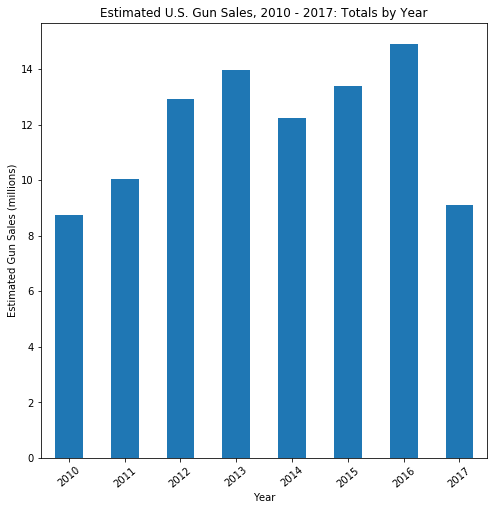

In [207]:
df_annual_totals.plot(x='year', y='totals', kind='bar', title='Estimated U.S. Gun Sales, 2010 - 2017: Totals by Year', figsize=[8,8], legend=None)
plt.ylabel('Estimated Gun Sales (millions)')
plt.xlabel('Year')
plt.xticks(rotation=40)


**The data in this bar plot show two interesting patterns: a stepwise increase in gun sales from 2010 to 2013, followed by a small drop in 2014 which began a similar stepwise increase through 2016. A somewhat precipitous drop in sales occurred in 2017. Given the many differences in state gun laws, explaining the pattern would require future research.**

I also wanted to see the trend(s) in terms the types of guns purchased.

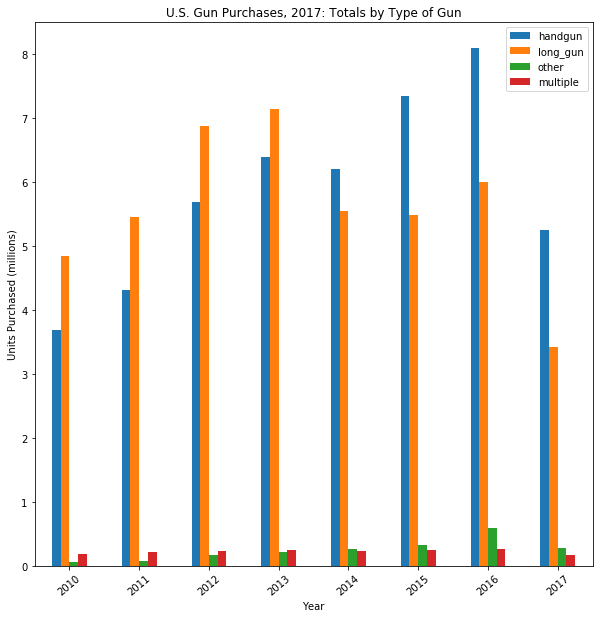

In [208]:
df_annual_totals.plot(x='year', y=['handgun', 'long_gun', 'other', 'multiple'],  kind='bar', title='U.S. Gun Purchases, 2017: Totals by Type of Gun', figsize=[10,10])
plt.ylabel('Units Purchased (millions)')
plt.xlabel('Year')
plt.xticks(rotation=40)
plt.show()

**While exhibiting the same overall pattern as the annual totals, this chart shows another pattern of interest: during the first stepwise pattern between 2010 and 2013, the most purchases were those of long guns (shotguns and rifles); yet in the subsequent pattern of decrease-then-increase, *handguns* outpaced long guns, even when sales plummeted in 2017.**

### Does the change in population explain the change in gun purchases?

A downside to the census dataset was the difficulty in using the demographic data to explore whether that data could show an impact on gun sales. The data in question---race, makeup of household, veteran status, and so forth---were aggregates for the years 2011 through 2015, which omit the endpoints of my desired timeline. Therefore, I chose to use only the population by state and the annual changes thereof.

Accordingly, I wanted to arrange the gun-purchase data to be easily juxtaposed to the population data. This necessitated creating another new dataframe for state totals, and to deal with the "permit" column in a manner similar to the annual-totals frame.


In [209]:
df_state_totals = df_gun.groupby(['state', 'year']).sum()

In [210]:
df_state_totals['permit'] = df_state_totals['handgun'] + df_state_totals['long_gun'] + df_state_totals['other'] + df_state_totals['multiple']
df_state_totals = df_state_totals.rename(columns={'permit': 'totals'})

In [211]:
df_state_totals.query('year==2010')

,,totals,handgun,long_gun,other,multiple
state,year,,,,,
Alabama,2010,260718,116963,136519,1771,5465
Alaska,2010,61241,25720,33177,825,1519
Arizona,2010,164088,89162,69067,2091,3768
Arkansas,2010,125979,49992,72206,636,3145
California,2010,520617,245159,275458,0,0
Colorado,2010,287891,130155,129642,0,28094
Connecticut,2010,88561,47545,40546,470,0
Delaware,2010,19240,9230,9466,207,337
District of Columbia,2010,319,308,11,0,0


Splitting the new dataframe further into totals by year, and converting each Series to type DataFrame to allow a merge() between them.

In [212]:
df_2017_totals = df_state_totals.query('year==2017')['totals']

In [213]:
#Convert the Series into a DataFrame:

df_2017_totals = df_2017_totals.to_frame().reset_index()


In [214]:
df_2017_totals.head()

,state,year,totals
0,Alabama,2017,125819
1,Alaska,2017,50561
2,Arizona,2017,194295
3,Arkansas,2017,100810
4,California,2017,627508


In [215]:
df_2010_totals = df_state_totals.query('year==2010')['totals']

In [216]:
df_2010_totals

state                 year
Alabama               2010    260718
Alaska                2010     61241
Arizona               2010    164088
Arkansas              2010    125979
California            2010    520617
Colorado              2010    287891
Connecticut           2010     88561
Delaware              2010     19240
District of Columbia  2010       319
Florida               2010    534587
Georgia               2010    200187
Guam                  2010       542
Hawaii                2010         0
Idaho                 2010     67040
Illinois              2010    231601
Indiana               2010    234059
Iowa                  2010     41172
Kansas                2010    130008
Kentucky              2010    191291
Louisiana             2010    214671
Maine                 2010     63092
Mariana Islands       2010         0
Maryland              2010     85849
Massachusetts         2010     57410
Michigan              2010    149522
Minnesota             2010    179841
Mississippi

In [217]:
df_2010_totals = df_2010_totals.to_frame().reset_index()

In [218]:
df_2010_totals.head()

,state,year,totals
0,Alabama,2010,260718
1,Alaska,2010,61241
2,Arizona,2010,164088
3,Arkansas,2010,125979
4,California,2010,520617


Merging the two totals-based datasets:

In [219]:
df_purchases = df_2017_totals.merge(df_2010_totals, on='state', how='outer')

In [220]:
df_purchases.head()

,state,year_x,totals_x,year_y,totals_y
0,Alabama,2017,125819,2010,260718
1,Alaska,2017,50561,2010,61241
2,Arizona,2017,194295,2010,164088
3,Arkansas,2017,100810,2010,125979
4,California,2017,627508,2010,520617


Now to compute the changes in population, and repopulate the "state" column with postal abbreviations to improve legibility on the visualizations:

In [221]:
df_purchases['change_in_purchases'] = df_purchases.apply(lambda row: row['totals_x'] - row['totals_y'], axis=1)

In [222]:
states = ('AL', 'AK', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'DC','FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MP', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA', 'WA', 'WV', 'WI', 'WY')
df_purchases['state abbr'] = states

In [223]:
df_purchases.head()

,state,year_x,totals_x,year_y,totals_y,change_in_purchases,state abbr
0,Alabama,2017,125819,2010,260718,-134899,AL
1,Alaska,2017,50561,2010,61241,-10680,AK
2,Arizona,2017,194295,2010,164088,30207,AR
3,Arkansas,2017,100810,2010,125979,-25169,AZ
4,California,2017,627508,2010,520617,106891,CA


In [224]:
#Removing rows for District of Columbia, Guam, Mariana Islands, Puerto Rico, and US Virgin Islands. They are too small
#and removing them equalizes the sizes of df_permits and df_census.

df_purchases.drop(df_purchases.index[[8, 11, 21, 41, 49]], inplace=True)

In [225]:
df_purchases.head(10)

,state,year_x,totals_x,year_y,totals_y,change_in_purchases,state abbr
0,Alabama,2017,125819,2010,260718,-134899,AL
1,Alaska,2017,50561,2010,61241,-10680,AK
2,Arizona,2017,194295,2010,164088,30207,AR
3,Arkansas,2017,100810,2010,125979,-25169,AZ
4,California,2017,627508,2010,520617,106891,CA
5,Colorado,2017,294216,2010,287891,6325,CO
6,Connecticut,2017,74558,2010,88561,-14003,CT
7,Delaware,2017,30106,2010,19240,10866,DE
9,Florida,2017,689790,2010,534587,155203,FL
10,Georgia,2017,199556,2010,200187,-631,GA


In [226]:
df_purchases.reset_index().drop('index', axis=1)

,state,year_x,totals_x,year_y,totals_y,change_in_purchases,state abbr
0,Alabama,2017,125819,2010,260718,-134899,AL
1,Alaska,2017,50561,2010,61241,-10680,AK
2,Arizona,2017,194295,2010,164088,30207,AR
3,Arkansas,2017,100810,2010,125979,-25169,AZ
4,California,2017,627508,2010,520617,106891,CA
5,Colorado,2017,294216,2010,287891,6325,CO
6,Connecticut,2017,74558,2010,88561,-14003,CT
7,Delaware,2017,30106,2010,19240,10866,DE
8,Florida,2017,689790,2010,534587,155203,FL
9,Georgia,2017,199556,2010,200187,-631,GA


In order to properly observe changes in population in the same manner as changes in gun purchases, the census dataset had to be treated in a similar fashion, including a transposition for an other merge later on.

In [228]:
df_census

,Census Yr,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2016,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
3,2010,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"


In [229]:
df_census = df_census.transpose()

In [230]:
df_census = df_census.reset_index()

In [231]:
df_census.head(3)

,index,0,3
0,Census Yr,2016,2010
1,Alabama,"4,863,300","4,779,736"
2,Alaska,"741,894","710,231"


In [232]:
df_census = df_census.rename(columns={'index': 'State', 0: '2016_Pop', 3: '2010_Pop'} )

In [233]:
df_census.head(3)

,State,2016_Pop,2010_Pop
0,Census Yr,2016,2010
1,Alabama,"4,863,300","4,779,736"
2,Alaska,"741,894","710,231"


In [234]:
df_census.drop(0, axis=0, inplace=True)

In [235]:
df_census.head()

,State,2016_Pop,2010_Pop
1,Alabama,"4,863,300","4,779,736"
2,Alaska,"741,894","710,231"
3,Arizona,"6,931,071","6,392,017"
4,Arkansas,"2,988,248","2,915,918"
5,California,"39,250,017","37,253,956"


In [236]:
df_census.dtypes

State       object
2016_Pop    object
2010_Pop    object
dtype: object

In order to perform calculations on the population data, I of course had to convert them to integers; first, by removing
the commas, then by the actual conversion:

In [237]:
df_census['2016_Pop'] = df_census['2016_Pop'].str.replace(',', "")

In [238]:
df_census['2010_Pop'] = df_census['2010_Pop'].str.replace(',', "")

In [239]:
df_census.head(3)

,State,2016_Pop,2010_Pop
1,Alabama,4863300,4779736
2,Alaska,741894,710231
3,Arizona,6931071,6392017


In [240]:
df_census['2010_Pop'] = df_census['2010_Pop'].astype(int)

In [241]:
df_census['2016_Pop'] = df_census['2016_Pop'].astype(int)

In [242]:
df_census.dtypes

State       object
2016_Pop     int64
2010_Pop     int64
dtype: object

In [243]:
df_census['Pop_Change'] = df_census.apply(lambda row: row['2016_Pop'] - row['2010_Pop'], axis=1)

In [244]:
df_census.head()

,State,2016_Pop,2010_Pop,Pop_Change
1,Alabama,4863300,4779736,83564
2,Alaska,741894,710231,31663
3,Arizona,6931071,6392017,539054
4,Arkansas,2988248,2915918,72330
5,California,39250017,37253956,1996061


In [245]:
df_census.head(3)

,State,2016_Pop,2010_Pop,Pop_Change
1,Alabama,4863300,4779736,83564
2,Alaska,741894,710231,31663
3,Arizona,6931071,6392017,539054


In [246]:
states = ['AL', 'AK', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NB', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA',  'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
df_census['State'] = states

In [247]:
df_census.head(12)

,State,2016_Pop,2010_Pop,Pop_Change
1,AL,4863300,4779736,83564
2,AK,741894,710231,31663
3,AR,6931071,6392017,539054
4,AZ,2988248,2915918,72330
5,CA,39250017,37253956,1996061
6,CO,5540545,5029196,511349
7,CT,3576452,3574097,2355
8,DE,952065,897934,54131
9,FL,20612439,18801310,1811129
10,GA,10310371,9687653,622718


Now I plotted the change data for both gun purchases and population to see if any similar patterns might exist:

Text(0.5,1,'Change in U.S. Gun Purchases by State: 2017 vs 2010')

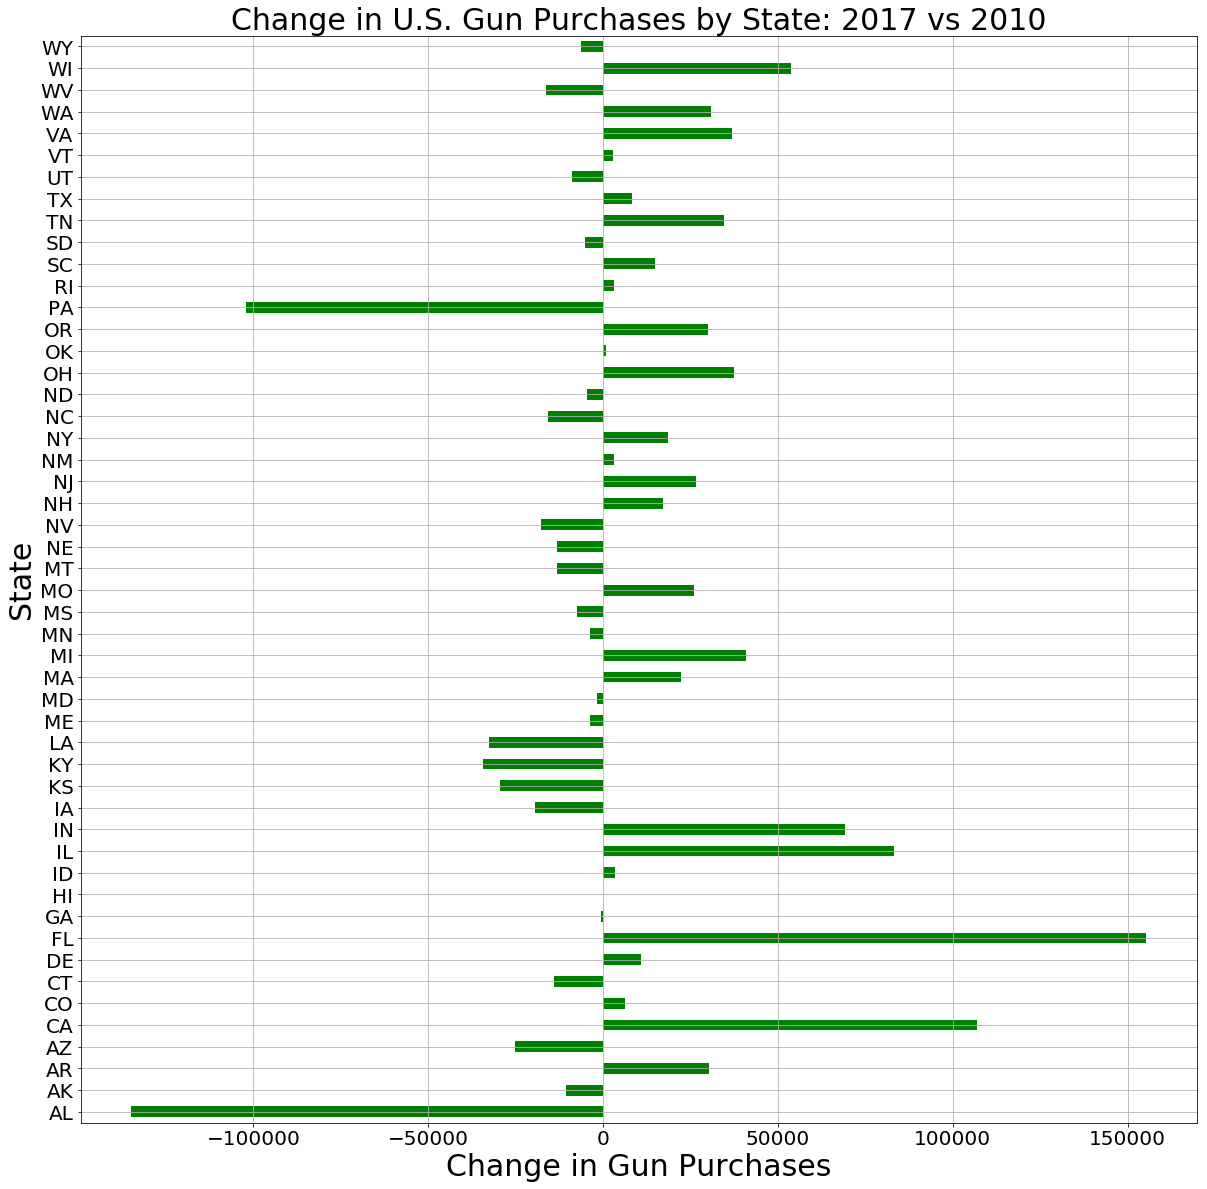

In [248]:
df_purchases.plot(x='state abbr', y='change_in_purchases', kind='barh', color='green', width=0.5, fontsize=20, figsize=[20,20], grid=True, legend=None)
plt.ylabel('State', fontsize=30)
plt.xlabel('Change in Gun Purchases', fontsize=30)
plt.title('Change in U.S. Gun Purchases by State: 2017 vs 2010', fontsize=30)

Text(0.5,1,'Change in U.S. State Populations: 2016 vs 2010')

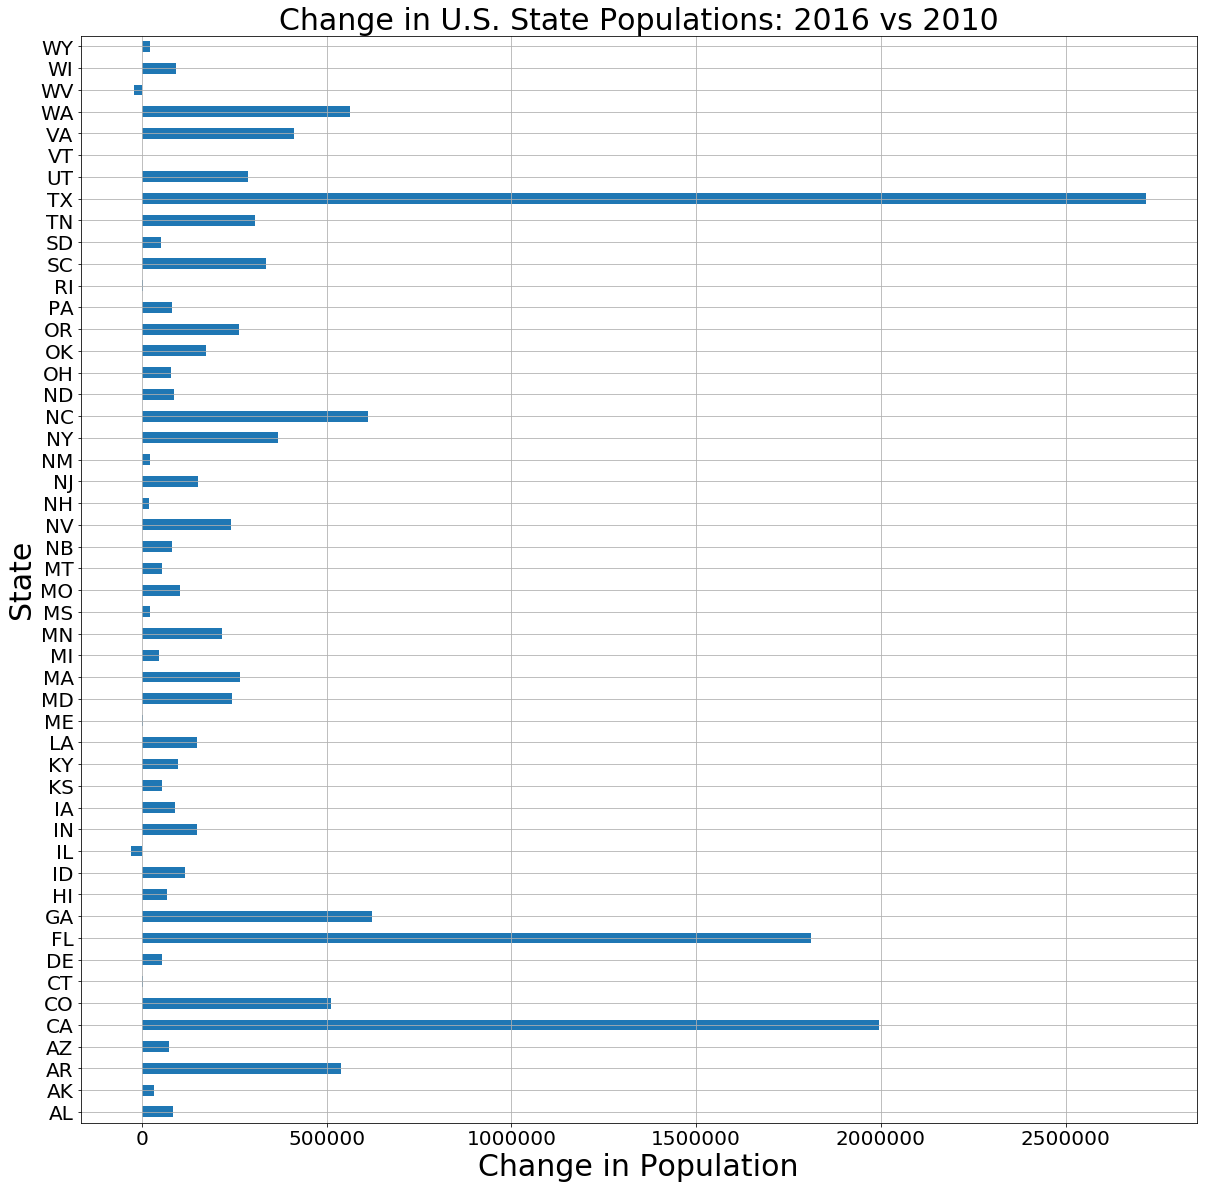

In [249]:
df_census.plot(x='State', y='Pop_Change', kind='barh', width=.5, fontsize=20, figsize=[20,20], grid=True, legend=None)
plt.ylabel('State', fontsize=30)
plt.xlabel('Change in Population', fontsize=30)
plt.title('Change in U.S. State Populations: 2016 vs 2010', fontsize=30)

**So far, so not good. Both charts have absolutely no similarities in patterns. Undeterred, I set out to compare the purchase and population variables directly in a last-ditch effort to seek any degree of correlation.**

In [92]:
df_purchases['state'] = states

In [93]:
df_purchases.drop('state abbr', axis=1, inplace=True)

In [94]:
df_purchases.rename(columns={'totals_x': '2017_totals', 'totals_y': '2010_totals'}, inplace=True)

In [95]:
df_purchases.drop(['year_x', 'year_y'], axis=1, inplace=True)

In [96]:
df_purchases.head()

,state,2017_totals,2010_totals,change_in_purchases
0,AL,125819,260718,-134899
1,AK,50561,61241,-10680
2,AR,194295,164088,30207
3,AZ,100810,125979,-25169
4,CA,627508,520617,106891


In [97]:
df_census.head()

,State,2016_Pop,2010_Pop,Pop_Change
1,AL,4863300,4779736,83564
2,AK,741894,710231,31663
3,AR,6931071,6392017,539054
4,AZ,2988248,2915918,72330
5,CA,39250017,37253956,1996061


Merged the total-purchases/population dataframes in order to compare changes in gun purchases and changes in population:

In [98]:
df_alldata = df_purchases.merge(df_census, on=df_purchases['state'], how='left')

In [99]:
df_alldata.head(3)

,state,2017_totals,2010_totals,change_in_purchases,State,2016_Pop,2010_Pop,Pop_Change
0,AL,125819,260718,-134899,AL,4863300,4779736,83564
1,AK,50561,61241,-10680,AK,741894,710231,31663
2,AR,194295,164088,30207,AR,6931071,6392017,539054


In [100]:
df_alldata.drop(['State'], axis=1, inplace=True)

In [101]:
df_alldata.head()

,state,2017_totals,2010_totals,change_in_purchases,2016_Pop,2010_Pop,Pop_Change
0,AL,125819,260718,-134899,4863300,4779736,83564
1,AK,50561,61241,-10680,741894,710231,31663
2,AR,194295,164088,30207,6931071,6392017,539054
3,AZ,100810,125979,-25169,2988248,2915918,72330
4,CA,627508,520617,106891,39250017,37253956,1996061


Text(0.5,1,'U.S. Population Change vs Change in Gun Purchases: 2017 & 2010')

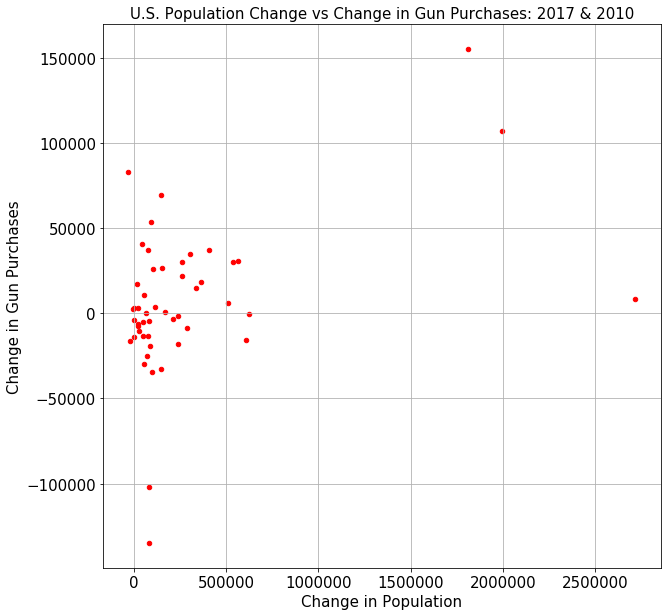

In [102]:
df_alldata.plot(x='Pop_Change', y='change_in_purchases', kind='scatter', fontsize=15, figsize=[10,10], grid=True, legend=None, color='red')

plt.ylabel('Change in Gun Purchases', fontsize=15)

plt.xlabel('Change in Population', fontsize=15)

plt.title('U.S. Population Change vs Change in Gun Purchases: 2017 & 2010', fontsize=15)  

In [253]:
df_alldata['Pop_Change'].corr(df_alldata['change_in_purchases'])

0.42750687987504893

**As I suspected, the correlation is quite weak. Therefore the answer to this section's question is a resounding NO.**

<a id='conclusions'></a>
## Conclusions

The changes in gun purchases in the United States from 2010 to 2017 are not explained to any degree by the changes in population from 2010 to 2016. The limitations of the data, as put forth in the Introduction, provide very little in the way of using census data as a means of interpreting any findings. The demographic data only covered a portion of the timeline in question, and the reasons for gun purchases in the U.S. are as varied as the population itself: political leanings, perspectives of the Second Amendment to the U.S. Constitution, the need or desire to hunt for food or trophy purposes, and so forth. 

Moreover, the New York Times analytical methodology I used has its own limits, since measuring permit checks (whether by sporting-goods establishments or pawn shops) does not automatically correlate to the actual sales. Moreover, it is an open secret that many such transactions, however legal, do not always involve a criminal (or other type of) background check, e.g., the many gun shows ocurring on a near-daily basis in one part of the Republic or another.


In [254]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0